In [1]:
!pip install matplotlib==3.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from plotly import express as ex
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objs as go
from google.colab import files


In [4]:
application_df = files.upload()

Saving impacts.csv to impacts.csv


In [4]:
application_df = pd.read_csv("Resources/Meteorite_Landings.csv")
application_df.head(10)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [5]:
application_df = application_df[(application_df.reclat != 0.0) & (application_df.reclong != 0.0)]
clean_data = application_df.dropna()

In [6]:
clean_data.replace(to_replace="Fell", value = "Seen", inplace=True)
df = clean_data.groupby(["fall", "year"]).size().unstack().T.fillna(0).astype(int)
df = df.reset_index()
df = df[df.year >= 1900][df.year <= 2022]

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(
<ipython-input-6-5cca270a6a52>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df.year >= 1900][df.year <= 2022]


In [7]:
df.head(10)

fall,year,Found,Seen
138,1900.0,8,8
139,1901.0,5,4
140,1902.0,5,7
141,1903.0,14,8
142,1904.0,7,4
143,1905.0,9,5
144,1906.0,6,7
145,1907.0,12,4
146,1908.0,7,6
147,1909.0,8,2


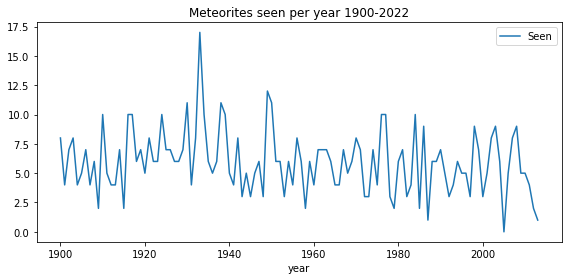

In [8]:
df.plot(x="year", y="Seen", figsize=(8,4))
plt.title("Meteorites seen per year 1900-2022")
plt.tight_layout()

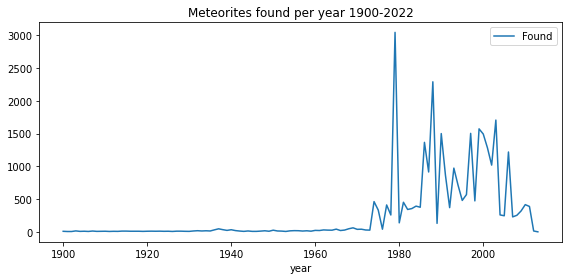

In [9]:
df.plot(x="year", y="Found", figsize=(8,4))
plt.title("Meteorites found per year 1900-2022")
plt.tight_layout()

In [10]:
clean_data2 = clean_data[clean_data.year >= 1900][clean_data.year <= 2023][clean_data.fall == "Found"]

<ipython-input-10-1c2595f561ec>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_data2 = clean_data[clean_data.year >= 1900][clean_data.year <= 2023][clean_data.fall == "Found"]


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

<Figure size 10800x10800 with 0 Axes>

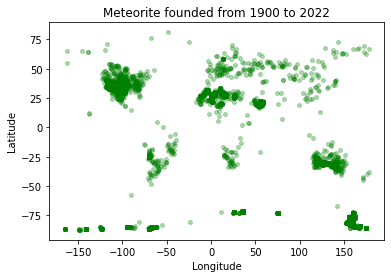

In [11]:
plt.figure(figsize=(150,150))
ax = clean_data2.plot(kind='scatter', x='reclong', y='reclat',color="green", s=15, alpha=0.3)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.title("Meteorite founded from 1900 to 2022")
plt.tight_layout

Text(0, 0.5, 'Latitude')

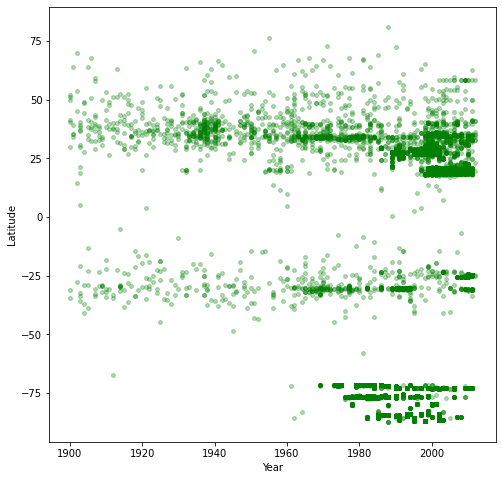

In [12]:
plt.figure(figsize=(8,8))
ax = clean_data2.plot(kind='scatter', x='year', y='reclat',color="green",s=15,alpha=0.3,ax=plt.gca())
ax.set_xlabel("Year")
ax.set_ylabel("Latitude")

In [13]:
data = application_df
data.head(20)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)"
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)"
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)"
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)"
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)"


In [14]:
print(data.isnull().values.any())
print('Missing values for each column:\n', data.isnull().sum())
print('Total number of missing values: ', data.isnull().sum().sum())

True
Missing values for each column:
 name              0
id                0
nametype          0
recclass          0
mass            131
fall              0
year            263
reclat         7315
reclong        7315
GeoLocation    7315
dtype: int64
Total number of missing values:  22339


In [15]:
# Drop data rows with NA values
valid = data.copy()
valid.dropna(inplace=True)
valid.drop('GeoLocation', axis=1, inplace=True)
valid.drop('id', axis=1, inplace=True)
valid = valid[valid['year']<2022]
valid = valid[valid['year']>860]
fell = valid.where(valid['fall']=='Fell')
found = valid.where(valid['fall']=='Found')
valid.head(20)

,name,nametype,recclass,mass,fall,year,reclat,reclong
0,Aachen,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000
4,Achiras,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000
5,Adhi Kot,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000
6,Adzhi-Bogdo (stone),Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667
7,Agen,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667
8,Aguada,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333
9,Aguila Blanca,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000


In [16]:
print(valid.isnull().values.any())

False


In [17]:
px.scatter_geo(data_frame = data, lat = 'reclat', lon = 'reclong', color = 'recclass', title = 'Meteorite Location and Class')

In [18]:
data['fall'] = data.fall.apply(lambda x : 'observed' if x == 'Fell' else 'not-observed')
px.scatter_geo(data_frame = data, lat = 'reclat', lon = 'reclong', color = 'fall', title = 'Metero Location and Class')

In [19]:
px.pie(data_frame = data, names = data.fall.value_counts().index, values = data.fall.value_counts(), title = 'Fallen Meteorite %')

In [20]:
nobs = data.groupby('fall')['recclass'].value_counts()['not-observed']
obs  = data.groupby('fall')['recclass'].value_counts()['observed']

In [21]:
def get_percentage(x, data):
    perc = []
    idx = x.index
    for i, vc in enumerate(x):
        val = (vc / data[data.recclass == idx[i]].shape[0])
        p = round(val * 100, 1)
        perc.append(p)
        
    res = pd.DataFrame({
        'value_counts' : x.values,
        'percentage'   : perc
    }, index = idx)
    return res

In [22]:
pd.options.display.max_columns = None
get_percentage(nobs, data).T

recclass,L6,H5,L5,H4,H6,LL5,LL6,L4,H4/5,CM2,H3,"Iron, IIIAB",L3,Ureilite,LL4,LL,E3,H5/6,Diogenite,Howardite,Eucrite-pmict,CV3,Eucrite,CO3,CR2,Mesosiderite,EH3,H~5,"Iron, IIAB",LL3,"Iron, ungrouped",L5/6,Iron,L3.5,CK5,L~6,"Iron, IAB-MG",H3.7,Martian (shergottite),H3.8,Eucrite-mmict,H,Eucrite-br,Lunar (anorth),Relict OC,"Iron, IVA",H4-6,CK4,L3.8,H5-6,OC,L6,Aubrite,L4/5,"Iron, IAB complex",L3.4,LL5/6,Acapulcoite,EL6,L3.6,H3.9,H4-5,L3.7,"Iron, IAB-ung",Lunar,H3.6,L,H3-6,LL5-6,"Pallasite, PMG",H3-5,H3/4,L5-6,R4,Achondrite-ung,Eucrite-unbr,L~5,Pallasite,L4-6,LL4-6,L3-6,"Iron, IAB-sLL",L/LL3,L3.9,H5,L4-5,LL3.7,Lodranite,H~6,L5,L7,Ureilite-pmict,L-imp melt,Brachinite,CH3,Winonaite,EL3,LL7,H3.5,LL3.5,Angrite,CM1,Eucrite-cm,H~4,"Iron, IID",L/LL6,LL3.8,Lunar (basalt),L3.2,L3.3,LL3.9,EH4,H3.4,"Iron, IVB",LL3.4,R5,Chondrite-ung,"Iron, IIIE",L/LL4,LL3.6,"Iron, IIE",L-melt rock,L3-5,L3.1,LL3.3,R3,C3-ung,CK3,CK4/5,H-imp melt,H4,H7,L/LL5,C2-ung,CK6,CO3.5,EL4,L3/4,Lunar (feldsp. breccia),"Pallasite, PMG-an",Stone-uncl,EH4/5,H/L4,H3-4,"Iron, IC","Iron, IIIF",L3.8-6,L6/7,L~4,CM1/2,H/L6,H4-an,"Iron, IAB-sLM","Iron, IIC",LL3.2,LL4-5,LL~5,Martian (nakhlite),OC3,R3-6,R3.8,C,CR,Diogenite-pm,E6,H3.3,"Iron, IAB-sHL",LL(L)3,Mesosiderite-C,Achondrite-prim,Aubrite-an,CO3.2,E,E3-an,EH-imp melt,H-melt rock,H-metal,H/L3,H4/6,"Iron, IAB-sLH","Iron, IIE-an","Iron, IIG","Iron, IVA-an",LL3.1,Mesosiderite-an,R6,CBb,CO3.3,E-an,E5,EL5,H3.9/4,"Iron, IAB-sHH","Iron, IIF",L-metal,L/LL5/6,"Pallasite, ungrouped",Unknown,Acapulcoite/Lodranite,CBa,CI1,CK5/6,CO3.0,CO3.4,CO3.6,CV3-an,Chondrite-fusion crust,E4,EH5,Eucrite-Mg rich,Fusion crust,H-an,H3.9-6,"Iron, IAB?","Iron, IIIAB?",L(LL)3,L/LL3.4,LL3-6,LL3.0,LL6/7,LL~6,Mesosiderite-B,Mesosiderite-B1,"Pallasite, PES",R3-5,R3.9,C4-ung,CK3-an,CO3.1,Diogenite-olivine,EH6,Enst achon,Enst achon-ung,Eucrite-an,H/L5,H3.0,H3.2-an,H5-melt breccia,"Iron, IAB-an",L/LL~6,L3-4,L4,L6-melt breccia,LL-melt rock,LL3.10,LL3.8-6,LL4/5,LL~3,Lunar (gabbro),Mesosiderite-A1,Mesosiderite-A2,Mesosiderite-A4,Mesosiderite-B4,R,R3.6,R3.8-6,Ureilite-an,C4,C6,CB,CK,CK4-an,CM-an,CO3.8,Diogenite-an,EH,EL6/7,H(5?),H(L)3,H3.1,H3.2,H3.6-6,H3.7-5,H3.8-6,H3.8-an,H3.8/4,H3.9-5,H6-melt breccia,H6/7,H~4/5,"Iron, IC-an","Iron, IID-an","Iron, IIIAB-an",L(?)3,L(LL)3.05,L/LL3.2,L/LL~5,L3.0,L3.05,L3.8-5,L3.9-6,LL3-5,LL3.15,LL6,Lunar (bas. breccia),Lunar (bas/anor),Mesosiderite-A,Mesosiderite-A3,Mesosiderite-B2,Mesosiderite-C2,R3.7,R3/4,Acapulcoite/lodranite,C1-ung,C1/2-ung,C2,C3/4-ung,C4/5,C5/6-ung,CH/CBb,CH3,CK3.8,CK3/4,CM,CM2-an,CO3,CR-an,CR1,CV2,E5-an,EH6-an,EH7,EL3/4,EL4/5,EL6,EL7,H(?)4,H(L)3-an,H/L3-4,H/L3.5,H/L3.7,H/L4-5,H/L4/5,H/L6-melt rock,H/L~4,H3,H3-an,H3.0-3.4,H3.10,H3.2-3.7,H3.2-6,H3.4-5,H3.4/3.5,H3.5-4,H3.7-6,H3.7/3.8,H3.8-4,H3.8-5,H3.8/3.9,H4(?),H5-an,H6,H?,Impact melt breccia,"Iron, IIAB-an","Iron, IIE?","Iron, IIIE-an",Iron?,K,K3,L(H)3,L(LL)3.5-3.7,L(LL)5,L(LL)6,L(LL)~4,L-melt breccia,L/LL,L/LL(?)3,L/LL-melt rock,L/LL3-5,L/LL3-6,L/LL3.10,L/LL3.5,L/LL3.6/3.7,L/LL4-6,L/LL4/5,L/LL5-6,L/LL~4,L3-7,L3.0-3.7,L3.0-3.9,L3.10,L3.2-3.5,L3.2-3.6,L3.3-3.5,L3.3-3.6,L3.3-3.7,L3.4-3.7,L3.5-3.7,L3.5-3.8,L3.5-3.9,L3.5-5,L3.6-4,L3.7-3.9,L3.7-4,L3.7/3.8,L3.8-an,L3.9-5,L3.9/4,L4-an,L4-melt rock,L5-7,L6-melt rock,LL3-4,LL3.1-3.5,LL3.7-6,LL3.9/4,LL3/4,LL4/6,LL5-7,LL6(?),LL7(?),LL<3.5,LL~4,LL~4/5,Lodranite-an,Lunar (bas/gab brec),Lunar (norite),L~3,Martian,Martian (OPX),Martian (chassignite),Mesosiderite?,Pallasite?,R3-4,R3.4,R3.5-6,R3.8-5,R4/5,Relict H,Relict iron,Stone-ung
value_counts,7024.0,6284.0,4172.0,3601.0,3588.0,2444.0,1304.0,1092.0,407.0,350.0,314.0,271.0,268.0,236.0,223.0,220.0,206.0,182.0,179.0,172.0,152.0,151.0,149.0,135.0,116.0,115.0,107.0,107.0,107.0,107.0,101.0,95.0,87.0,85.0,83.0,83.0,76.0,74.0,72.0,71.0,67.0,67.0,66.0,65.0,65.0,62.0,61.0,60.0,58.0,57.0,55.0,54.0,50.0,50.0,49.0,48.0,46.0,45.0,45.0,45.0,43.0,43.0,42.0,41.0,40.0,39.0,38.0,36.0,36.0,35.0,34.0,33.0,32.0,32.0,31.0,30.0,30.0,29.0,28.0,27.0,26.0,23.0,23.0,23.0,22.0,22.0,22.0,22.0,21.0,21.0,21.0,21.0,

In [23]:
get_percentage(obs, data).T

recclass,L6,H5,H6,L5,H4,LL6,Stone-uncl,OC,L4,LL5,Eucrite-mmict,Howardite,CM2,H,"Iron, IIIAB",L,Aubrite,Diogenite,EL6,CV3,Eucrite-pmict,Iron,LL4,Eucrite-cm,H4/5,"Iron, IIAB",CI1,H3-5,Ureilite,"Iron, IVA","Iron, ungrouped",L/LL6,C2-ung,Diogenite-pm,EH4,H5-6,"Iron, IAB-sHL","Iron, IAB-ung","Iron, IID",L/LL4,L/LL5,L3,LL3.4,Martian (shergottite),Mesosiderite-A1,CK4,CR2,EH3,EH5,Eucrite,H3,H3-6,H3.8,H3/4,H4-5,H4-6,"Iron, IAB-sLL",L3.7,L5-6,L5/6,LL,LL3-6,LL3.6,"Pallasite, PMG",Unknown,Acapulcoite,Achondrite-ung,Angrite,C,C3-ung,CBa,CO3.2,CO3.3,CO3.4,CO3.5,CO3.6,CO3.7,CR2-an,EH3/4-an,EH7-an,Eucrite-br,H/L3.6,H/L3.9,H/L4,H3-4,H3.4,H3.7,H4-an,H5-7,H5/6,H?,"Iron, IAB complex","Iron, IAB-MG","Iron, IIE","Iron, IIE-an","Iron, IIF","Iron, IIIAB-an",Iron?,K3,L/LL6-an,L3-4,L3-6,L3.4,L3.6,L3.7-6,L4-6,LL3.00,LL3.15,LL3.2,LL3.3,LL3.8,LL3.9,LL4-6,LL7,Lodranite,Martian (chassignite),Martian (nakhlite),Mesosiderite,Mesosiderite-A3,Mesosiderite-A3/4,Mesosiderite-B2,Pallasite,"Pallasite, PMG-an",R3.8-6,Ureilite-an,Winonaite
value_counts,262.0,162.0,91.0,76.0,50.0,41.0,40.0,24.0,20.0,19.0,18.0,16.0,15.0,13.0,10.0,10.0,9.0,8.0,8.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,5.0,5.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
percentage,3.6,2.5,2.5,1.8,1.4,3.0,80.0,30.4,1.8,0.8,21.2,8.5,4.1,16.2,3.6,20.8,15.3,4.3,15.1,4.4,4.4,7.4,3.0,27.3,1.5,5.3,55.6,12.8,2.1,6.1,3.8,20.0,23.1,30.0,17.6,5.0,30.0,6.8,15.8,18.8,21.4,1.1,17.6,4.0,50.0,3.2,1.7,1.8,33.3,1.3,0.6,5.3,2.7,5.7,4.4,3.2,8.0,4.5,5.9,2.1,0.9,33.3,13.3,5.4,28.6,2.2,3.1,5.9,12.5,8.3,20.0,14.3,16.7,20.0,9.1,20.0,100.0,100.0,100.0,100.0,1.5,100.0,100.0,10.0,10.0,6.7,1.3,11.1,100.0,0.5,50.0,2.0,1.3,7.7,14.3,16.7,33.3,50.0,50.0,100.0,25.0,3.7,2.0,2.2,100.0,3.4,100.0,33.3,11.1,7.7,5.9,6.2,3.6,5.3,4.3,50.0,11.1,0.9,33.3,100.0,33.3,3.3,9.1,25.0,25.0,5.0


# Impact Data

In [70]:
impact_df = pd.read_csv("Resources/impacts.csv")

In [71]:
# Create function to show elbow method
def show_elbow(df):
    # Create a list to store inertia values
    inerita_list = []
    x_cord = []

    # Create a for loop to check for 1 to 10 number of cluster
    for k in range(1, 11):
      # Create KMeans model, fit the data
      model = KMeans(n_clusters=k)
      model.fit(df)
      # Get inerita of data and store it in the list 
      inerita_list.append(model.inertia_)
      x_cord.append(k)

    # Create inertia plot
    plt.figure(figsize=(12, 5))
    plt.plot(x_cord, inerita_list)
    plt.scatter(x_cord, inerita_list)

    for i in range(len(inerita_list)):
      plt.annotate(text=x_cord[i], xy=(x_cord[i], inerita_list[i]), xytext=(x_cord[i]+0.1, inerita_list[i]+0.25))

    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Inertia")
    plt.show()
# Create a function for analysis multidimensioal data using PCA
def graph(X, y, cmap="viridis", dim=2):
    pca = PCA(dim)
    X_component = pca.fit_transform(X)
    x1 = X_component[:, 0]
    x2 = X_component[:, 1]

    if (dim == 2):
        plt.scatter(x1, x2, c=y, cmap=cmap)

    elif (dim == 3):
        x3 = X_component[:, 2]
        fig = ex.scatter_3d(X_component, x=x1, y=x2, z=x3, color=y)
        return fig

In [72]:
# Print first 5 rows of the impact df
impact_df.head(25)

,Object Name,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Maximum Torino Scale
0,2006 WP1,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2013 YB,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2008 US,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2010 VR139,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,0
4,2015 ME131,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,0
5,2010 XB73,2017,2110,55,2.800000e-07,5.98,22.5,0.110,-5.03,-5.51,0
6,2005 TM173,2017,2111,123,9.000000e-07,8.79,24.1,0.052,-5.41,-6.42,0
7,2006 SF281,2017,2111,514,1.900000e-06,4.49,26.2,0.020,-5.91,-7.58,0
8,2010 VP139,2017,2112,350,1.800000e-05,2.04,28.5,0.007,-6.51,-7.54,0
9,2014 HR197,2017,2112,187,7.900000e-08,17.02,26.9,0.014,-7.18,-7.97,0


In [73]:
#info of the dataframe
impact_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Object Name                    683 non-null    object 
 1   Period Start                   683 non-null    int64  
 2   Period End                     683 non-null    int64  
 3   Possible Impacts               683 non-null    int64  
 4   Cumulative Impact Probability  683 non-null    float64
 5   Asteroid Velocity              683 non-null    float64
 6   Asteroid Magnitude             683 non-null    float64
 7   Asteroid Diameter (km)         683 non-null    float64
 8   Cumulative Palermo Scale       683 non-null    float64
 9   Maximum Palermo Scale          683 non-null    float64
 10  Maximum Torino Scale           683 non-null    object 
dtypes: float64(6), int64(3), object(2)
memory usage: 58.8+ KB


In [74]:
impact_df.drop(['Object Name'], axis=1, inplace=True)
impact_df.columns

Index(['Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale',
       'Maximum Torino Scale'],
      dtype='object')

In [75]:
impact_df.iloc[:, -1].value_counts()

0      680
(*)      3
Name: Maximum Torino Scale, dtype: int64

In [76]:
impact_df.drop(['Maximum Torino Scale'], axis=1, inplace=True)
impact_df.columns

Index(['Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale'],
      dtype='object')

In [77]:
impact_df.describe()

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
count,683.000000,683.000000,683.000000,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000
mean,2062.573939,2099.680820,43.348463,1.539476e-04,11.462577,26.158272,0.049378,-6.511552,-6.804012
std,43.501694,37.594698,113.773280,2.519607e-03,6.067772,2.388296,0.156403,1.509189,1.476135
min,2017.000000,2017.000000,1.000000,1.100000e-10,0.340000,15.600000,0.002000,-10.980000,-11.000000
25%,2034.000000,2090.000000,2.000000,1.100000e-07,7.240000,25.000000,0.010000,-7.490000,-7.790000
50%,2061.000000,2109.000000,6.000000,1.700000e-06,10.500000,26.400000,0.017000,-6.460000,-6.790000
75%,2085.000000,2114.000000,29.000000,1.550000e-05,14.810000,27.800000,0.033000,-5.490000,-5.865000
max,2880.000000,2880.000000,1144.000000,6.500000e-02,39.470000,31.600000,2.579000,-1.420000,-1.420000


In [78]:
impact_features = impact_df.columns
impact_features

Index(['Period Start', 'Period End', 'Possible Impacts',
       'Cumulative Impact Probability', 'Asteroid Velocity',
       'Asteroid Magnitude', 'Asteroid Diameter (km)',
       'Cumulative Palermo Scale', 'Maximum Palermo Scale'],
      dtype='object')

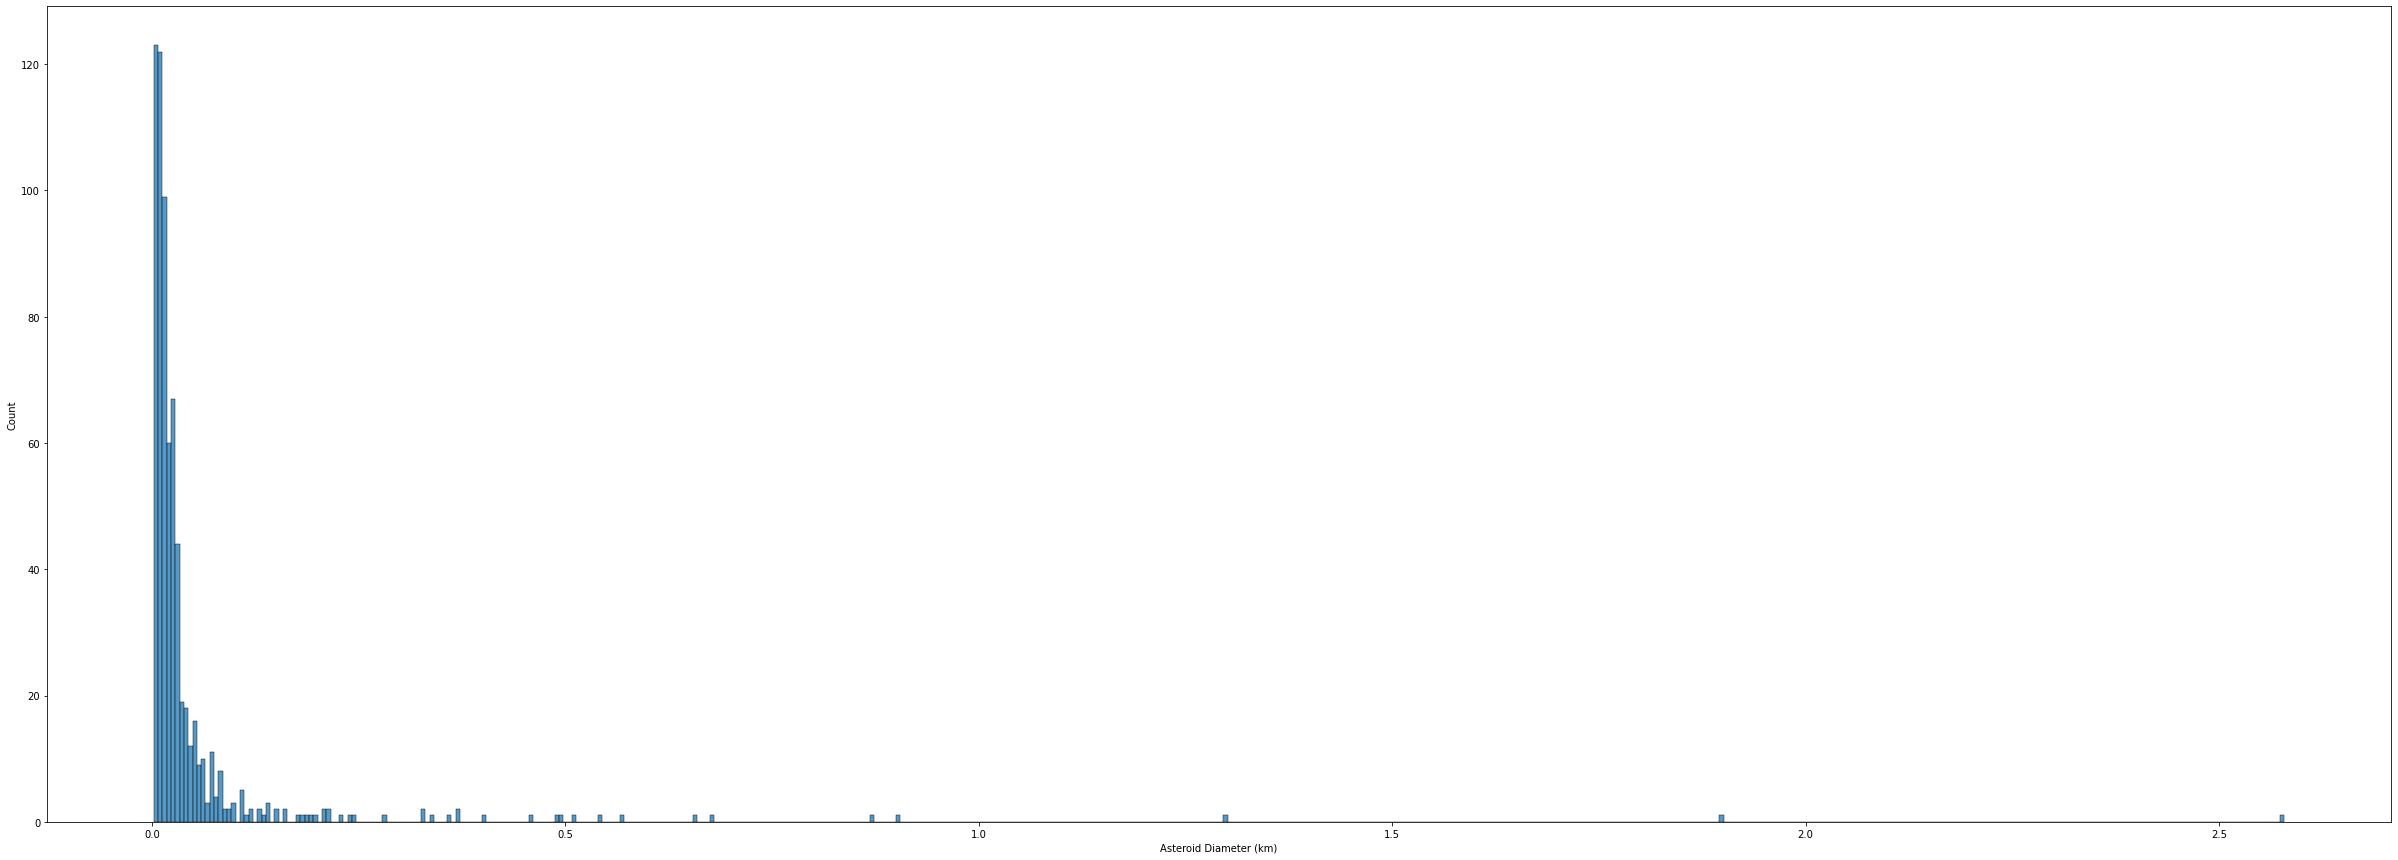

In [79]:
plt.figure(figsize=(42, 15))
sns.histplot(x="Asteroid Diameter (km)", data=impact_df)
plt.show()

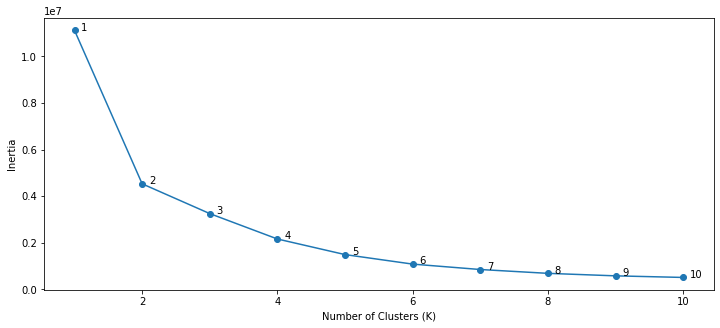

In [80]:
show_elbow(impact_df)

In [97]:
# Scale the data
scaler = StandardScaler()
impact_df_scaled = scaler.fit_transform(impact_df)

# Apply k-means to the scaled data
impact_model = KMeans(n_clusters=2, random_state=8)
impact_label = impact_model.fit_predict(impact_df_scaled)
impact_centroids = impact_model.cluster_centers_

# Add the cluster labels to the dataframe
impact_df['Label'] = impact_label
impact_df.head(20)

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale,Label
0,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31,0
1,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96,0
2,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87,0
3,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95,1
4,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30,1
5,2017,2110,55,2.800000e-07,5.98,22.5,0.110,-5.03,-5.51,1
6,2017,2111,123,9.000000e-07,8.79,24.1,0.052,-5.41,-6.42,1
7,2017,2111,514,1.900000e-06,4.49,26.2,0.020,-5.91,-7.58,1
8,2017,2112,350,1.800000e-05,2.04,28.5,0.007,-6.51,-7.54,1
9,2017,2112,187,7.900000e-08,17.02,26.9,0.014,-7.18,-7.97,0


In [98]:
# number of Asteroid belongs to a particular label
impact_df['Label'].value_counts()

1    400
0    283
Name: Label, dtype: int64

In [99]:
impact_df.iloc[:, :-1]

,Period Start,Period End,Possible Impacts,Cumulative Impact Probability,Asteroid Velocity,Asteroid Magnitude,Asteroid Diameter (km),Cumulative Palermo Scale,Maximum Palermo Scale
0,2017,2017,1,5.200000e-09,17.77,28.3,0.007,-8.31,-8.31
1,2017,2046,23,7.600000e-05,8.98,31.4,0.002,-6.60,-6.96
2,2017,2062,30,1.600000e-05,18.33,31.4,0.002,-6.48,-6.87
3,2017,2076,24,2.000000e-07,4.99,26.7,0.016,-6.83,-6.95
4,2017,2096,85,2.300000e-08,19.46,19.2,0.497,-3.85,-4.30
...,...,...,...,...,...,...,...,...,...
678,2115,2115,1,2.800000e-07,15.00,28.0,0.008,-8.22,-8.22
679,2115,2115,1,2.300000e-08,3.27,29.2,0.005,-10.18,-10.20
680,2175,2199,78,3.700000e-04,5.99,20.2,0.490,-1.71,-2.32
681,2185,2198,7,1.600000e-03,15.87,22.1,0.160,-1.78,-1.83


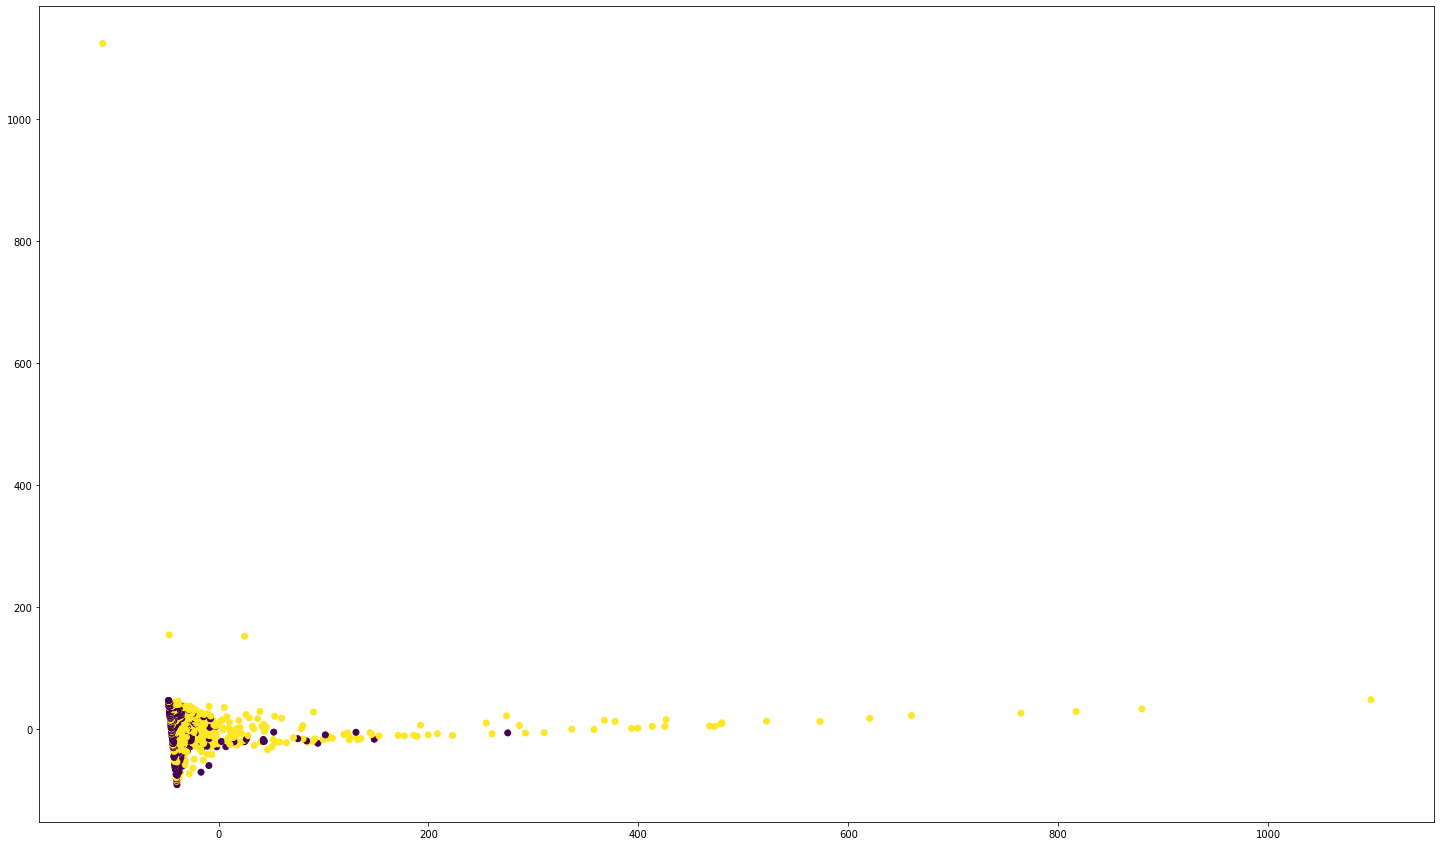

In [100]:
plt.figure(figsize=(25,15))
graph(X=impact_df.iloc[:, :-1], y=impact_df.iloc[:, -1])
plt.show()

In [101]:
impact_df.to_csv("Impact_clean.csv", index=False)

In [41]:
graph(X=impact_df.iloc[:, :-1], y=impact_df.iloc[:, -1], dim=3).show()